# Coursework 2
### CID: 02476922

I, 02476922, certify that this assessed coursework is my own work, unless otherwise acknowledged, and includes no
plagiarism. I have not discussed my coursework with anyone else except when seeking clarification with the module
lecturer via email or on MS Teams. I have not shared any code underlying my coursework with anyone else prior to
submission.

### Question 1 - Part 1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\frase\AppData\Local\Temp\ipykernel_3740\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#import the datasets, splitting into columns based on space, with no header
components = pd.read_csv("q1_data/components.csv", sep = " ", header = None)
temperatures = pd.read_csv("q1_data/temperatures.csv", header = None).to_numpy()
spectra = pd.read_csv("q1_data/spectra.csv", sep = " ", header = None)

In [3]:
###Exploratory Data Analysis###
#we do a ternary plot
import plotly.express as px
#make a temporary dataframe with labels as actual names for the ternary plots
components_labelled = components.rename(columns = {0:"Water",1:"Ethanol",2:"2-Propanol"})
#find counts
unique_components = components_labelled.groupby(components_labelled.columns.tolist(),as_index=False).size()
fig = px.scatter_ternary(unique_components,a = "Water", b = "Ethanol", c = "2-Propanol", size="size")
fig.show()

In [4]:
unique_components

,Water,Ethanol,2-Propanol,size
0,0.000000,0.000000,1.000000,5
1,0.000000,0.333868,0.666132,5
2,0.000000,0.499685,0.500315,5
3,0.000000,0.667071,0.332929,5
4,0.000000,1.000000,0.000000,5
5,0.162242,0.163008,0.674750,5
6,0.166248,0.333134,0.500618,5
7,0.166319,0.666851,0.166829,5
8,0.167002,0.500005,0.332993,5
9,0.322196,0.165550,0.512254,4


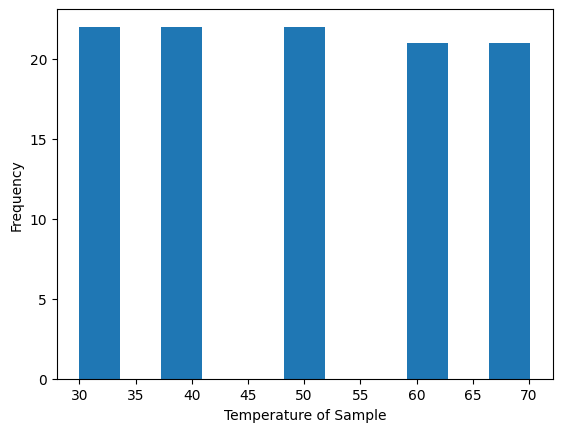

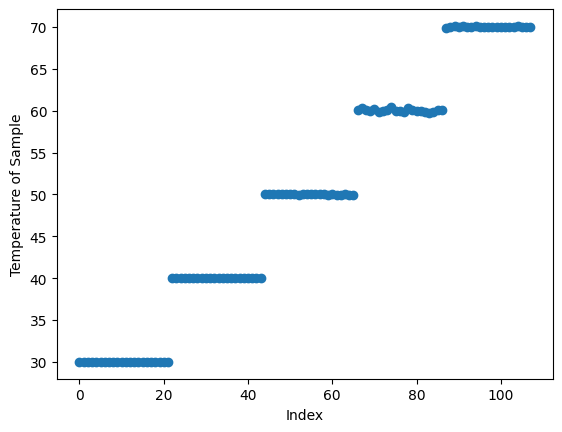

In [5]:
###Temperature###
plt.hist(temperatures,bins = 11)
plt.xlabel("Temperature of Sample")
plt.ylabel("Frequency")
#we see that it is grouped and chosen since the experimenter chose it as such
plt.show()

plt.plot(temperatures,"o")
plt.xlabel("Index")
plt.ylabel("Temperature of Sample")
plt.show()

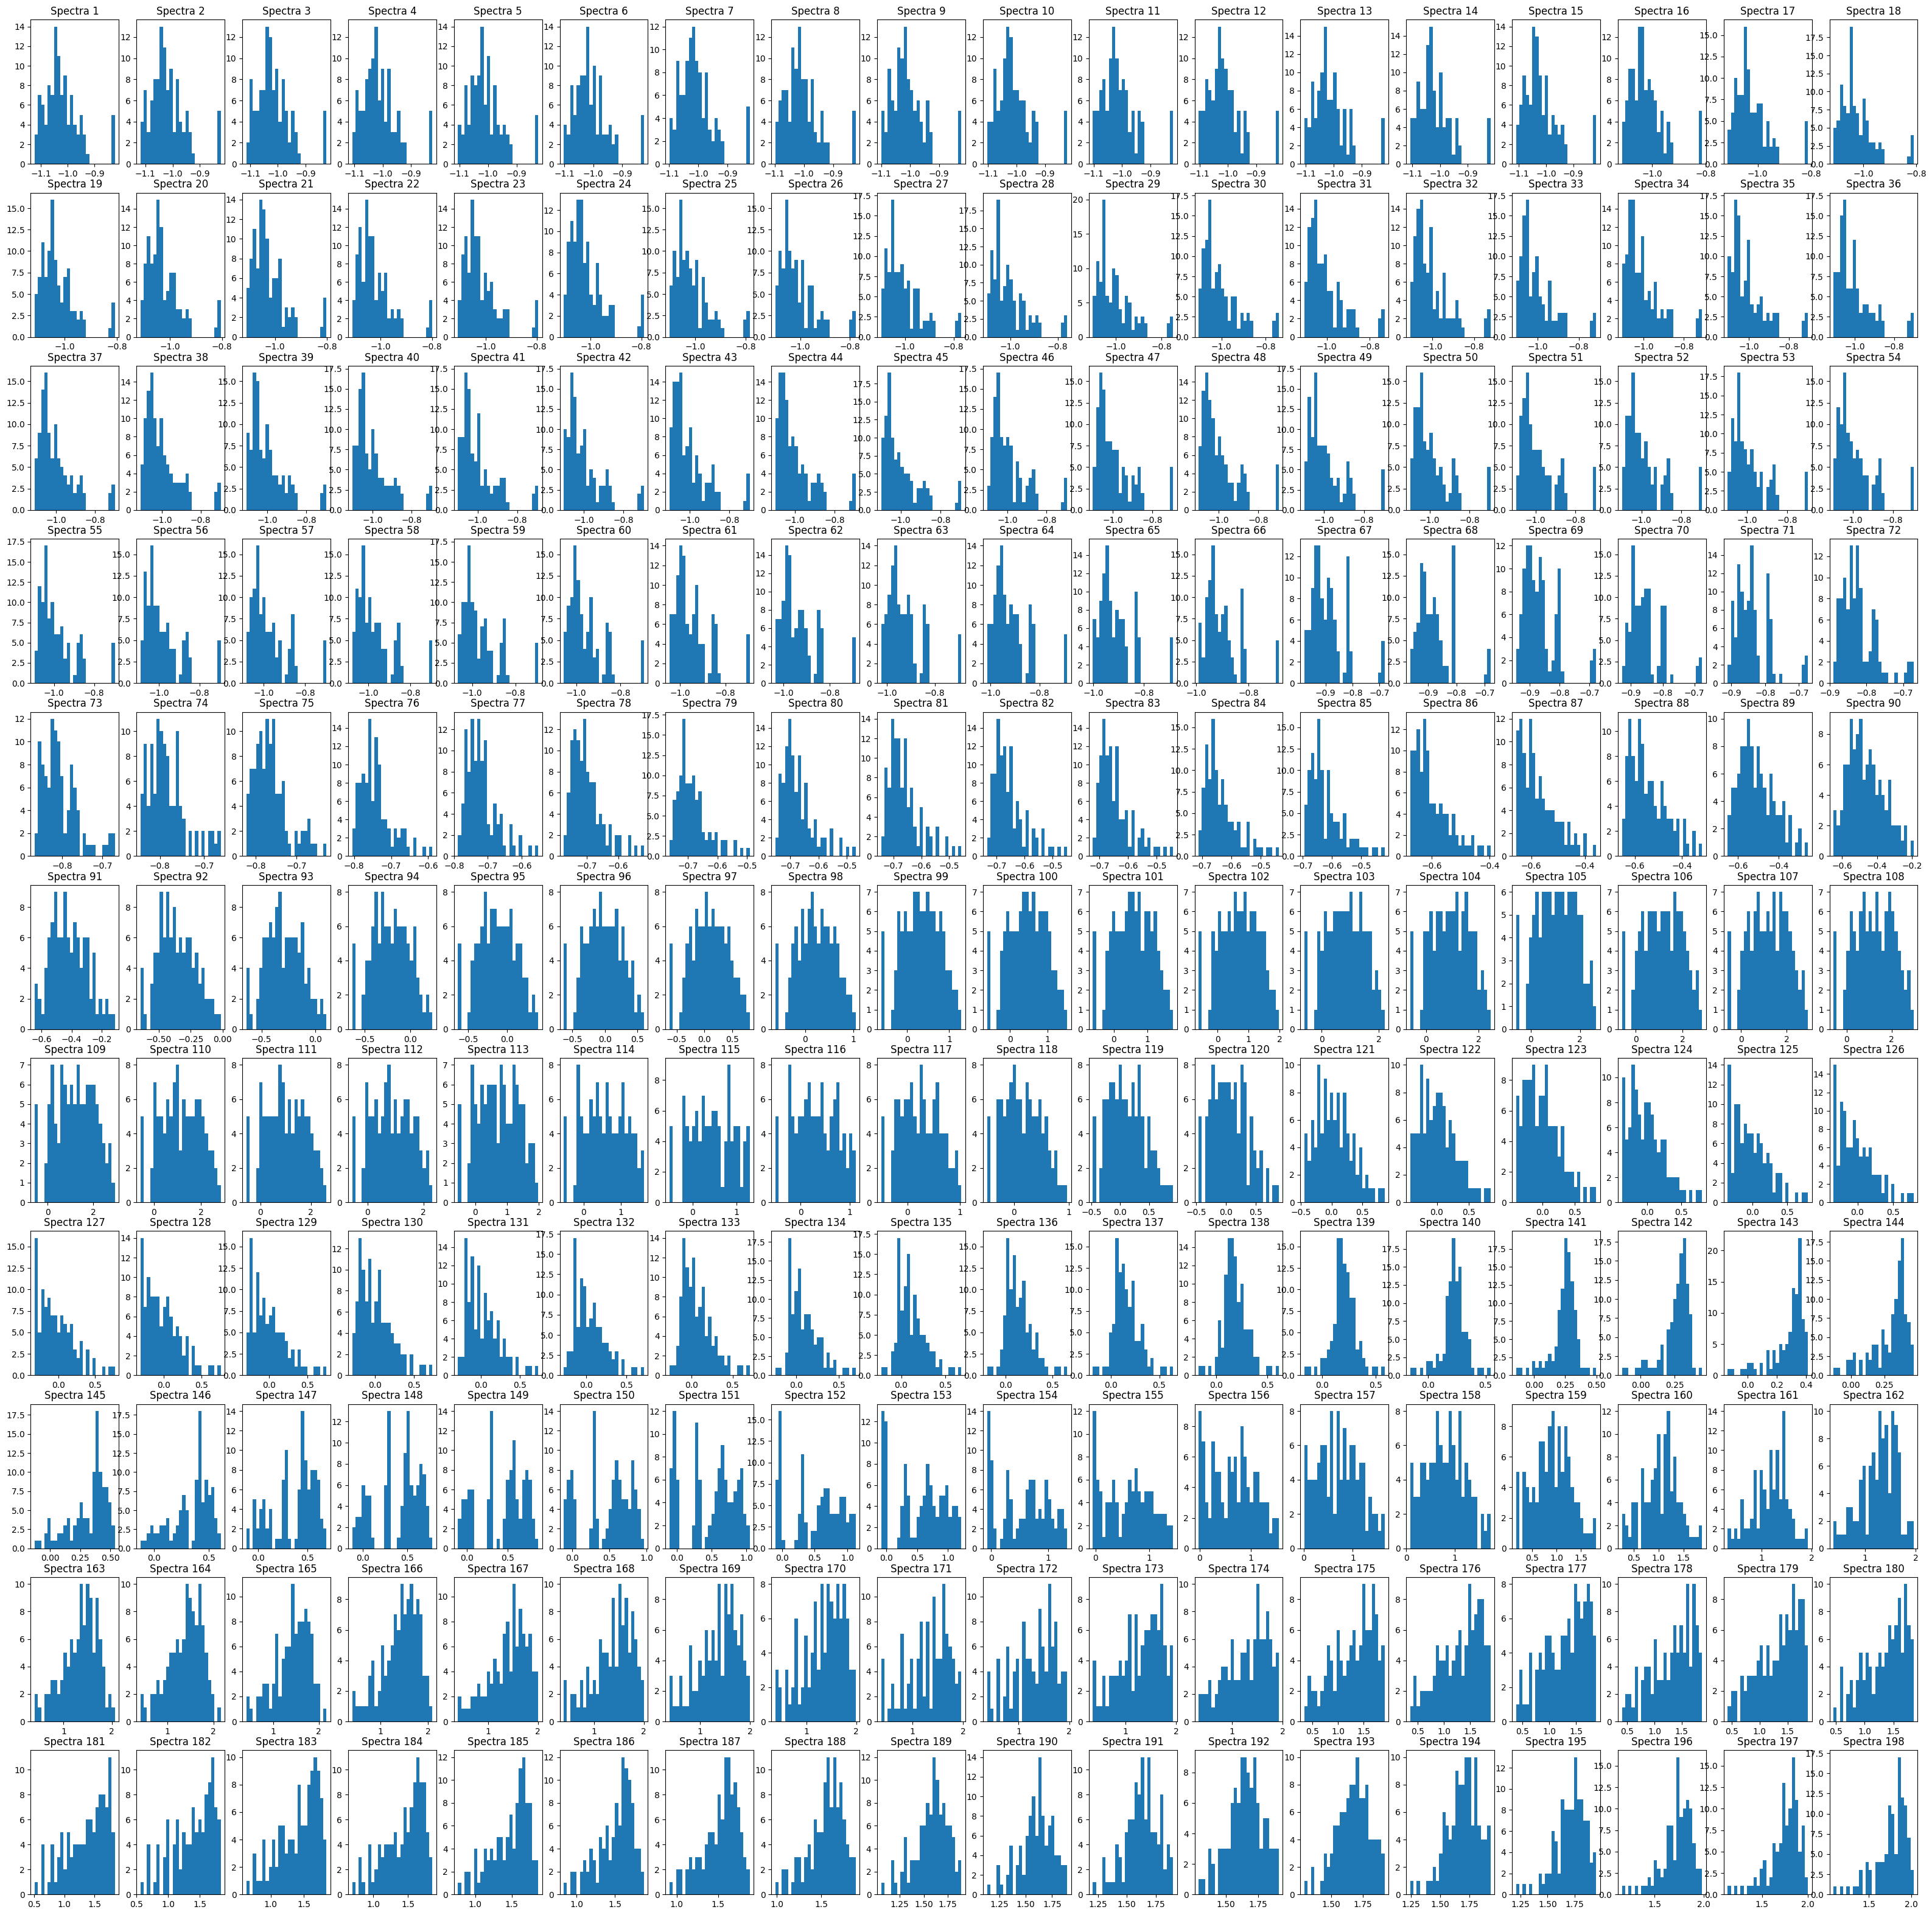

In [6]:
#spectra
fig,axs = plt.subplots(nrows = 11, ncols = 18)
fig.set_figheight(40)
fig.set_figwidth(40)

for i in range(11):
    for j in range(18):
        axs[i,j].hist(spectra.iloc[:,18*i+j],bins = 25)
        axs[i,j].set_title(f"Spectra {18*i+j + 1}")
plt.show()

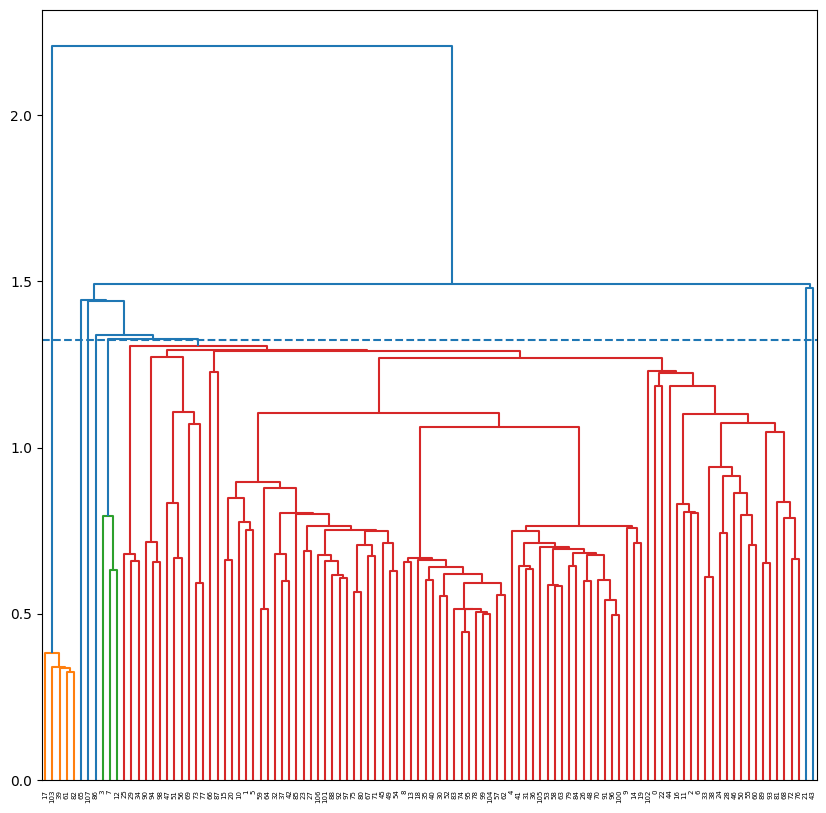

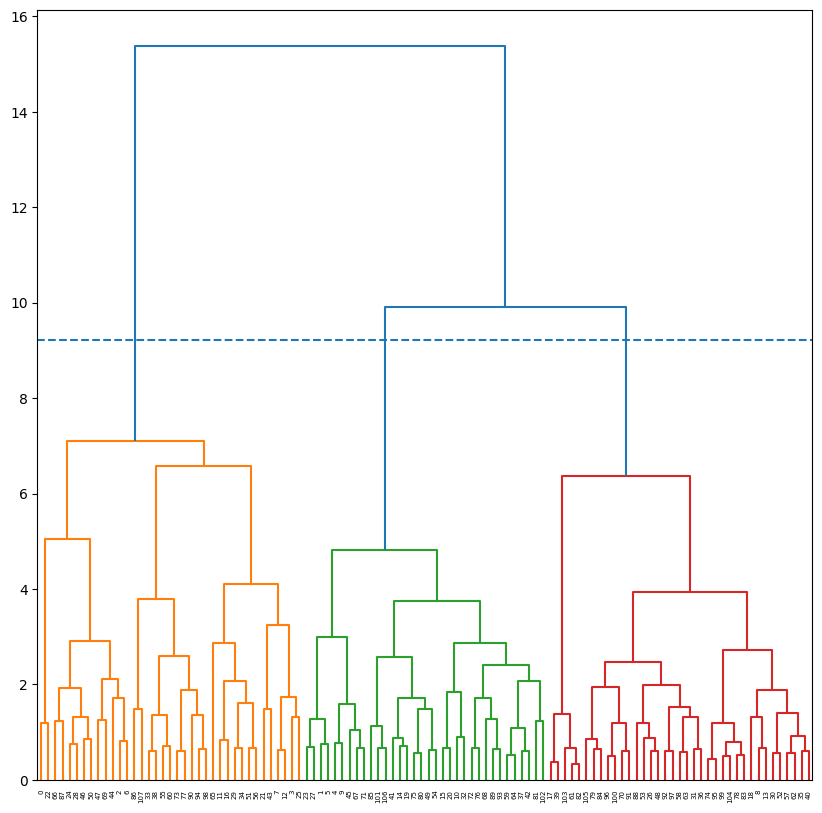

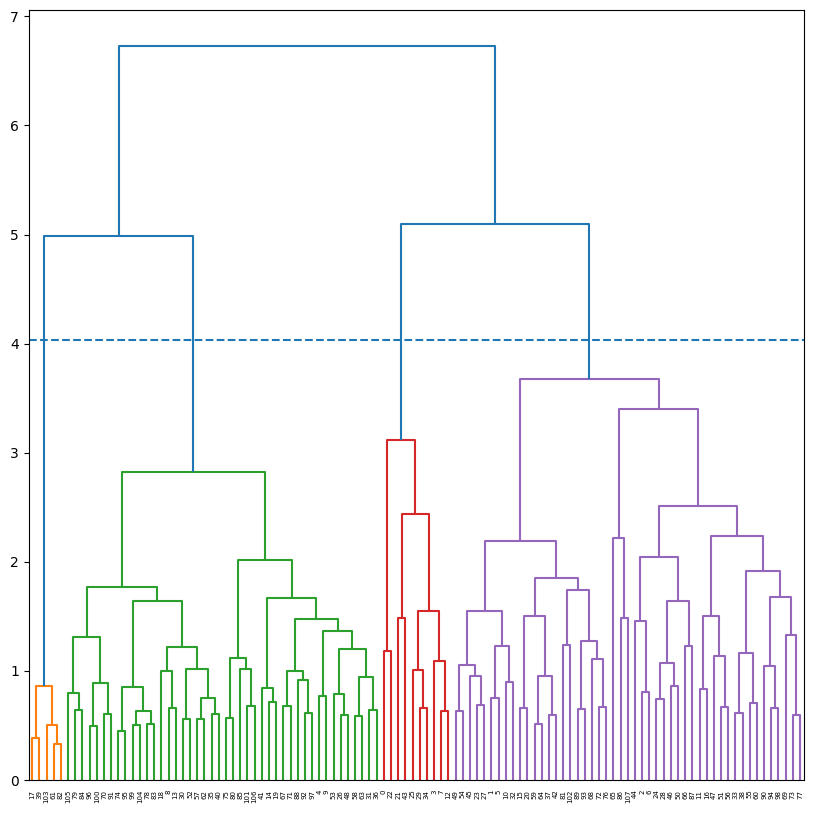

In [7]:
### 2 - HIERARCHICAL CLUSTERING ###
from scipy.cluster.hierarchy import linkage, dendrogram
hdata = linkage(spectra, method="single",metric = "euclidean")
plt.figure(figsize=(10,10))
cutoff = 0.6
dend = dendrogram(hdata, labels=spectra.index,color_threshold=cutoff*max(hdata[:,2]))
#add the cutoff
plt.axhline(y = cutoff*max(hdata[:,2]), linestyle='dashed')
plt.xticks(rotation = 90)
plt.show()

hdata = linkage(spectra, method="complete",metric = "euclidean")
plt.figure(figsize=(10,10))
cutoff = 0.6
dend = dendrogram(hdata, labels=spectra.index,color_threshold=cutoff*max(hdata[:,2]))
#add the cutoff
plt.axhline(y = cutoff*max(hdata[:,2]), linestyle='dashed')
plt.xticks(rotation = 90)
plt.show()

hdata = linkage(spectra, method="average",metric = "euclidean")
plt.figure(figsize=(10,10))
cutoff = 0.6
dend = dendrogram(hdata, labels=spectra.index,color_threshold=cutoff*max(hdata[:,2]))
#add the cutoff
plt.axhline(y = cutoff*max(hdata[:,2]), linestyle='dashed')
plt.xticks(rotation = 90)
plt.show()

In [8]:
col_groups = dend["leaves_color_list"]
order = dend["ivl"]

In [9]:
#code to split into the color groups
col_groups_unique = sorted(list(set(col_groups)))

splits = []
indices = []

for i in range(1,len(col_groups_unique)+1):
    if i == 1:
        idx = col_groups.index(col_groups_unique[i])
        splits.append(order[0:idx])
    elif i != len(col_groups_unique):
        idx = col_groups.index(col_groups_unique[i])
        splits.append(order[indices[-1]:idx])
    else:
        splits.append(order[idx:])
    indices.append(idx)

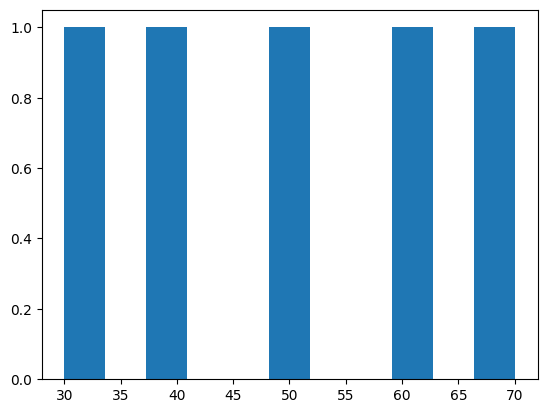

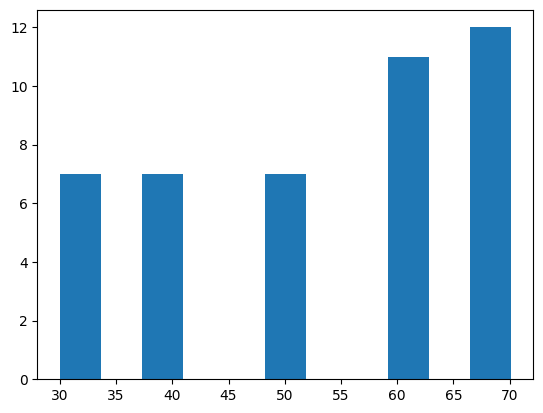

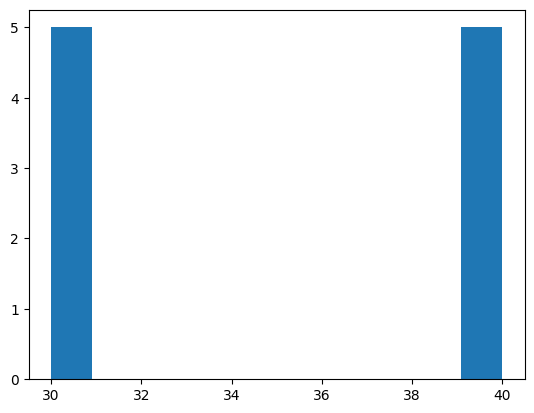

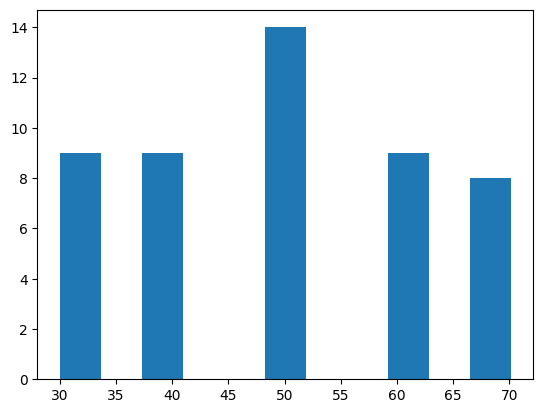

In [10]:
#plot ternary plot and histogram of temperature for each cluster
for cluster in splits:
    unique_components = components_labelled.iloc[cluster].groupby(components_labelled.columns.tolist(),as_index=False).size()
    fig = px.scatter_ternary(unique_components,a = "Water", b = "Ethanol", c = "2-Propanol",size = "size")
    fig.show()
    plt.hist(temperatures[cluster],bins = 11)
    plt.show()

In [11]:
### 3 ###

from sklearn.decomposition import PCA
import numpy as np
#first scale the data to have mean 0 and variance 1
spectra_scaled = (spectra - spectra.mean())/ spectra.std()
X = spectra_scaled.values

In [12]:
# PCA by hand - adapted from lectures#
eig = np.linalg.eig(np.matmul(X,X.T))
idx = np.argsort(eig[0])[::-1] # note unlike R, numpy does not automatically order by eignenvalue size
PCs = eig[1][:, idx]
var_explained = eig[0][idx]
var_explained *= 100.0 / var_explained.sum()
cum_var_explained = np.cumsum(var_explained)
print(cum_var_explained)
np.where(cum_var_explained>=99)

[ 66.63152693  87.97170508  94.85342413  98.01883326  99.60962896
  99.88349417  99.92387205  99.95554721  99.97917954  99.98358911
  99.98656294  99.98819392  99.98925297  99.99008384  99.99083115
  99.99138087  99.99186904  99.99233061  99.99273771  99.99312524
  99.99349385  99.99385729  99.99417927  99.99448047  99.99475315
  99.99501417  99.99525845  99.99548381  99.9957065   99.99590059
  99.99608636  99.99626739  99.99643914  99.99660799  99.9967652
  99.996919    99.99706094  99.99719922  99.99733312  99.99746368
  99.99758706  99.99770453  99.99781522  99.99792438  99.99802629
  99.99812724  99.9982238   99.9983185   99.9984069   99.99848823
  99.99856689  99.99864225  99.99871374  99.99878053  99.99884567
  99.99890643  99.99896338  99.99901623  99.99906824  99.99911831
  99.99916532  99.99921064  99.99925528  99.99929581  99.99933509
  99.99937231  99.99940869  99.99944399  99.99947774  99.9995101
  99.99954151  99.99957176  99.99960017  99.99962651  99.99965242
  99.9996763

(array([  4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107],
       dtype=int64),)

[ 66.63152693  87.97170508  94.85342413  98.01883326  99.60962896
  99.88349417  99.92387205  99.95554721  99.97917954  99.98358911
  99.98656294  99.98819392  99.98925297  99.99008384  99.99083115
  99.99138087  99.99186904  99.99233061  99.99273771  99.99312524
  99.99349385  99.99385729  99.99417927  99.99448047  99.99475315
  99.99501417  99.99525845  99.99548381  99.9957065   99.99590059
  99.99608636  99.99626739  99.99643914  99.99660799  99.9967652
  99.996919    99.99706094  99.99719922  99.99733312  99.99746368
  99.99758706  99.99770453  99.99781522  99.99792438  99.99802629
  99.99812724  99.9982238   99.9983185   99.9984069   99.99848823
  99.99856689  99.99864225  99.99871374  99.99878053  99.99884567
  99.99890643  99.99896338  99.99901623  99.99906824  99.99911831
  99.99916532  99.99921064  99.99925528  99.99929581  99.99933509
  99.99937231  99.99940869  99.99944399  99.99947774  99.9995101
  99.99954151  99.99957176  99.99960017  99.99962651  99.99965242
  99.9996763

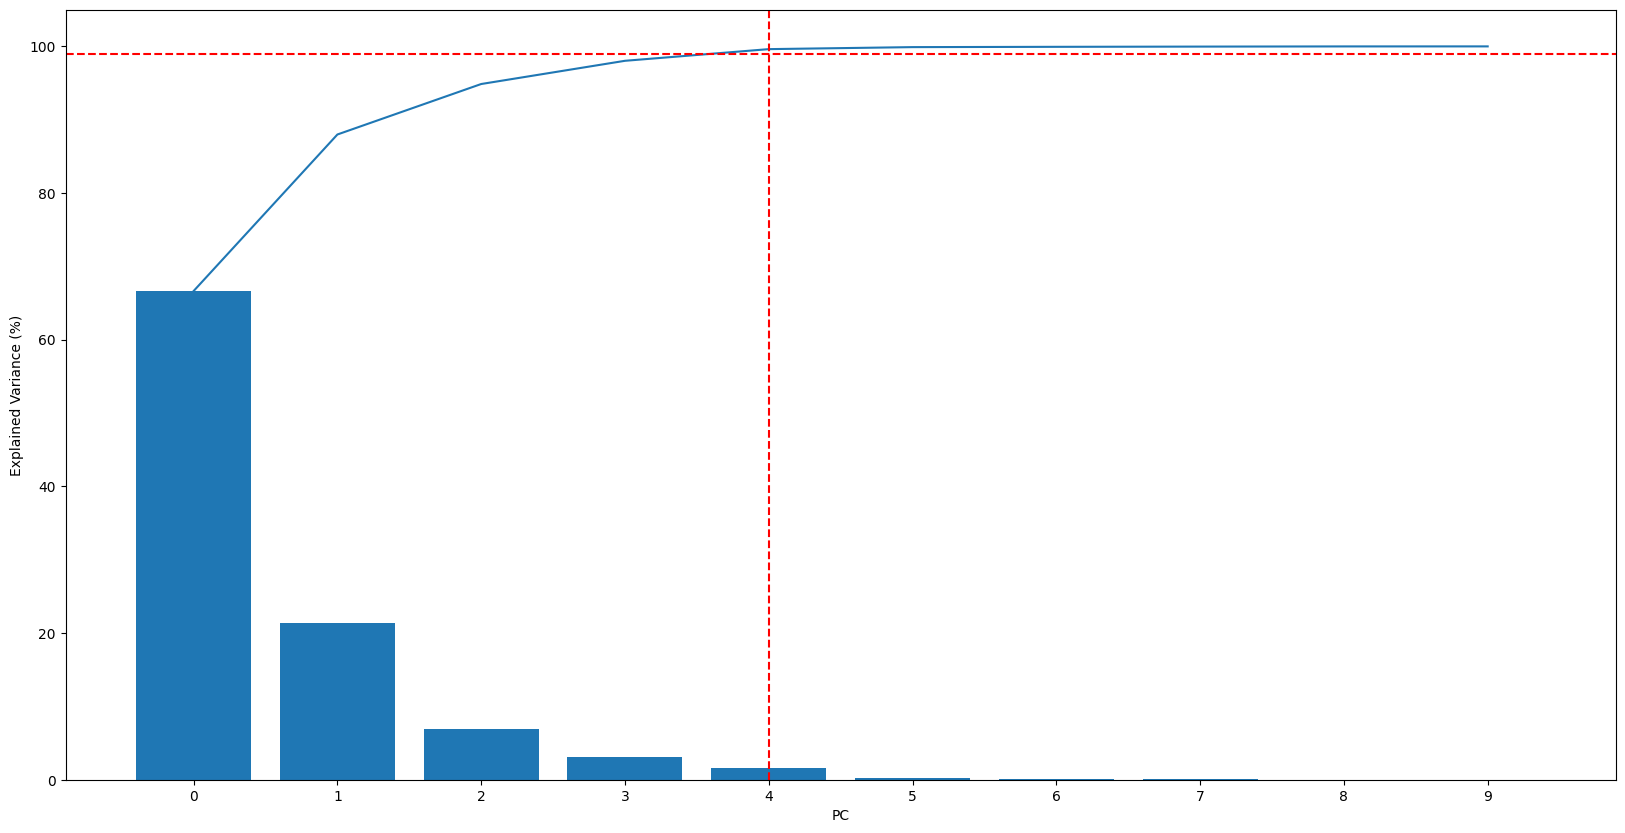

In [13]:
# PCA - using function #
prcomp = PCA()

pca_out = prcomp.fit(X)

var_explained = pca_out.explained_variance_
var_explained *= 100.0 / var_explained.sum()

cum_var_explained = np.cumsum(var_explained)
print(cum_var_explained)
print(np.where(cum_var_explained>=99))

#we set n_0 to be this plus 1 since it is the number of principal components
n_0 = np.where(cum_var_explained>=99)[0][0] + 1

#plot the first 15 PCs
var_explained_trunc = var_explained[:10]

#now plot the cumulative explained variance and 99% threshold and bar
plt.figure(figsize = (20,10))
plt.bar(x=range(len(var_explained_trunc)), height=var_explained_trunc)
plt.plot(np.cumsum(var_explained_trunc))
plt.xlabel("PC")
plt.ylabel("Explained Variance (%)")
plt.xticks(range(len(var_explained_trunc)))
#add the 99 % line
plt.axhline(y = 99,color = "red", ls = "--")
plt.axvline(x = n_0-1, color = "red", ls = "--")
plt.show()

In [14]:
#project the data into this space spanned by first 5
U = pca_out.components_.T
U_n_0 = U[:,:n_0]
print(U_n_0.shape)

Z = X @ U_n_0

(199, 5)


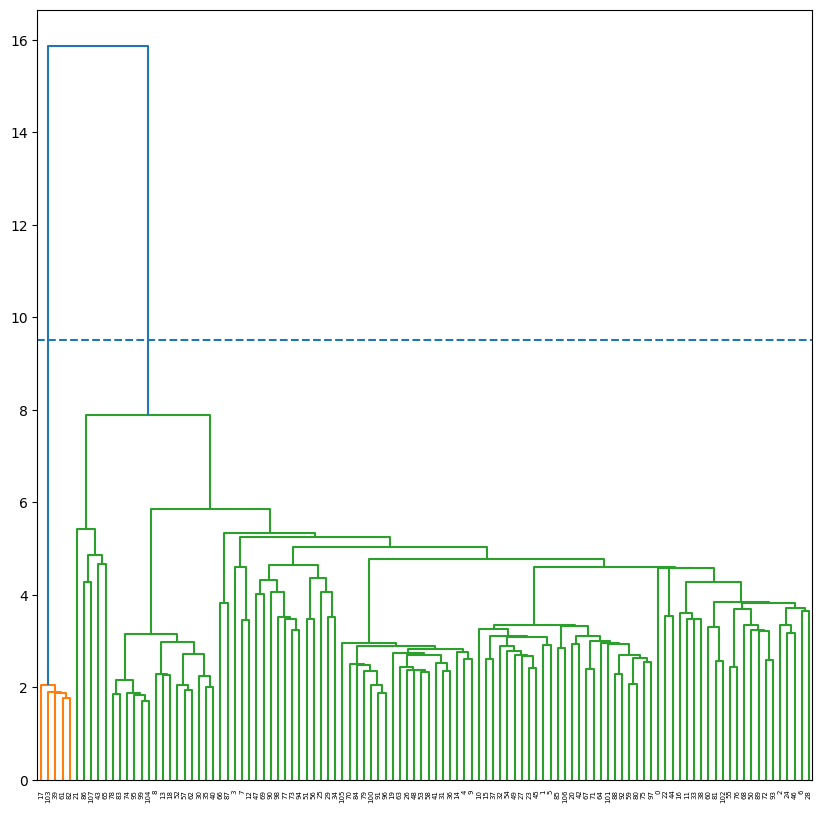

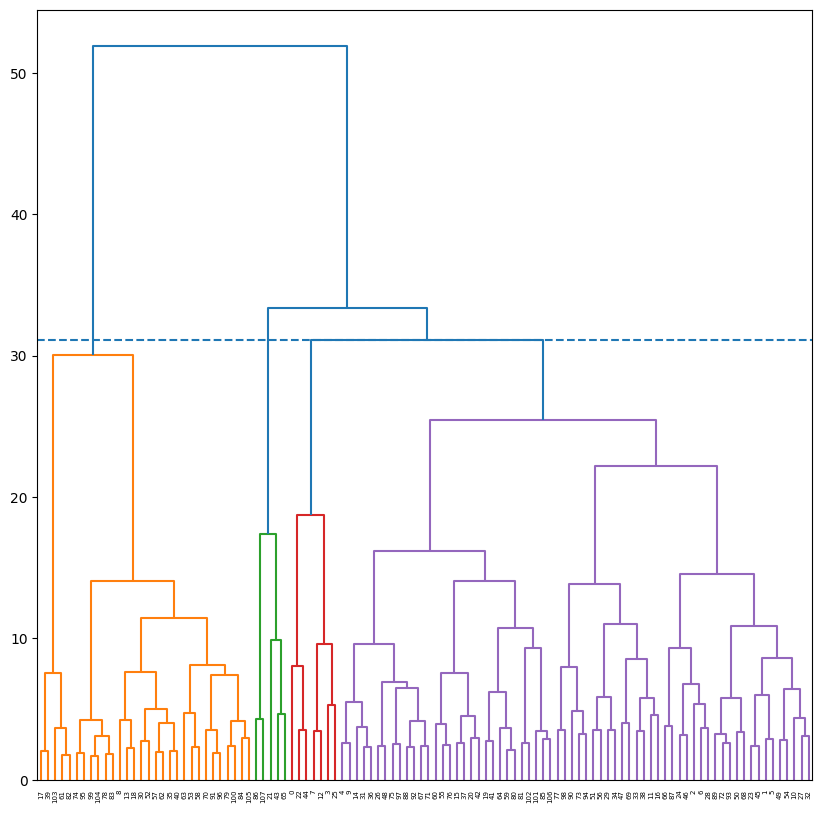

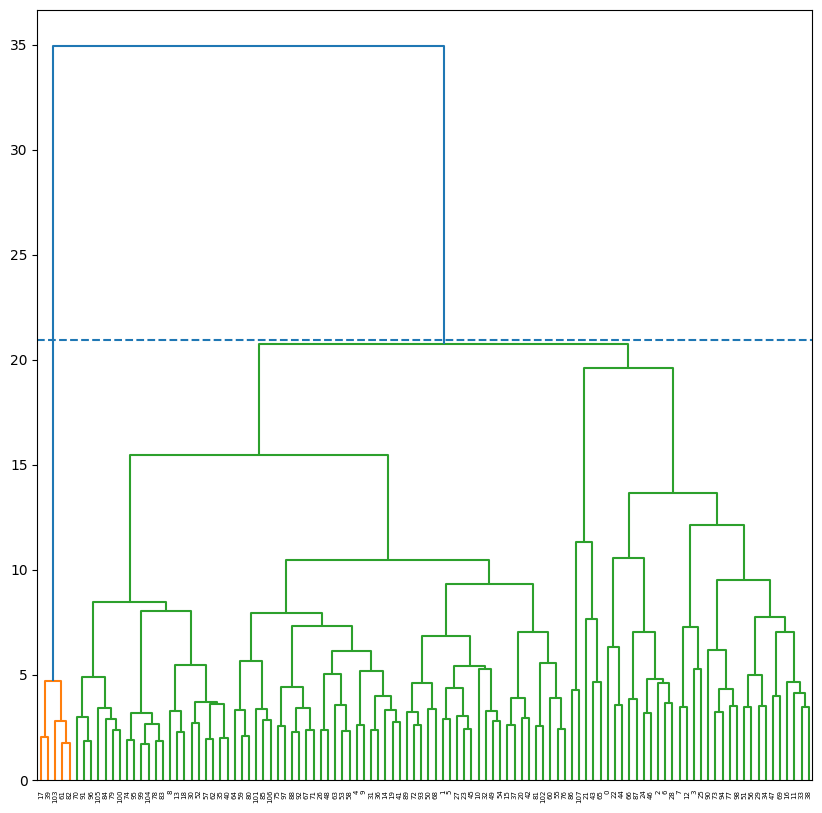

In [15]:
#hierarchical clustering again on projected data
hdata = linkage(Z, method="single",metric = "euclidean")
plt.figure(figsize=(10,10))
cutoff = 0.6
dend = dendrogram(hdata, labels=spectra.index,color_threshold=cutoff*max(hdata[:,2]))
#add the cutoff
plt.axhline(y = cutoff*max(hdata[:,2]), linestyle='dashed')
plt.xticks(rotation = 90)
plt.show()


hdata = linkage(Z, method="complete",metric = "euclidean")
plt.figure(figsize=(10,10))
cutoff = 0.6
dend = dendrogram(hdata, labels=spectra.index,color_threshold=cutoff*max(hdata[:,2]))
#add the cutoff
plt.axhline(y = cutoff*max(hdata[:,2]), linestyle='dashed')
plt.xticks(rotation = 90)
plt.show()


hdata = linkage(Z, method="average",metric = "euclidean")
plt.figure(figsize=(10,10))
cutoff = 0.6
dend = dendrogram(hdata, labels=spectra.index,color_threshold=cutoff*max(hdata[:,2]))
#add the cutoff
plt.axhline(y = cutoff*max(hdata[:,2]), linestyle='dashed')
plt.xticks(rotation = 90)
plt.show()

### Question 1 - Part 2


In [16]:
### 1 - dataset generation ###
n = len(spectra)
#seed
seed = 2476922
np.random.seed(seed)
#choose from the index array
I = np.random.choice(np.arange(n),40,replace = False)
#cast to int for temperature and composition
I = I.astype(np.int32)

#index the new dataframes
spectra_I = spectra.iloc[I]
temperatures_I = temperatures[I]
components_I = components.iloc[I]

#generate and add noise
sigma_n = 0.05
noise = np.random.normal(loc = 0, scale = sigma_n, size = (spectra_I.shape))
spectra_noisy = spectra_I + noise

#to remove exactly 80%, easiest is to flatten indices
total_cells = int(spectra_noisy.shape[0] * spectra_noisy.shape[1])
num_to_replace = int(0.8 * total_cells)
chosen_idx = np.random.choice(np.arange(total_cells), size = num_to_replace,replace = False)

#change to row and columns
row_to_replace = chosen_idx //spectra_noisy.shape[1]
col_to_replace = chosen_idx % spectra_noisy.shape[1]

spectra_noisy_nan = spectra_noisy.copy()
spectra_noisy_nan.values[row_to_replace,col_to_replace] = np.nan
print(spectra_noisy_nan)
spectra_noisy_nan.to_csv("spectra_noisy_nan.csv")

          0         1         2         3         4         5         6    \
53        NaN       NaN       NaN       NaN -1.007207       NaN       NaN   
84        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
105       NaN       NaN       NaN       NaN       NaN -1.001813       NaN   
106       NaN       NaN -0.911610       NaN       NaN       NaN -0.959001   
4         NaN       NaN       NaN       NaN -1.000729       NaN       NaN   
23        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
57        NaN       NaN       NaN       NaN       NaN -0.936645       NaN   
6   -1.088067       NaN       NaN       NaN       NaN -1.090572       NaN   
5         NaN -1.179379       NaN       NaN       NaN       NaN       NaN   
60        NaN       NaN       NaN       NaN       NaN -1.026690       NaN   
94  -0.930083       NaN       NaN       NaN       NaN -1.068796       NaN   
8   -1.036504       NaN       NaN -0.973172       NaN -1.001699 -0.836571   

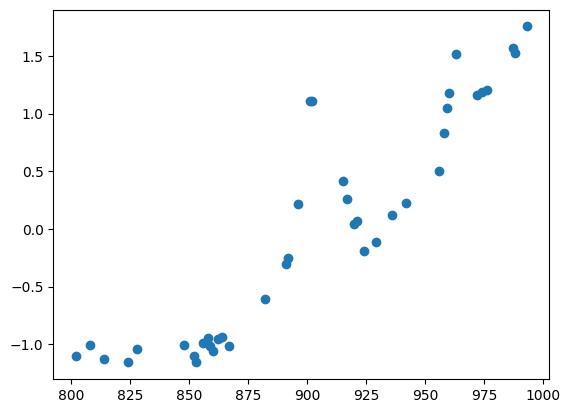

In [17]:
### 2 ###
spectra_noisy_nan = pd.read_csv("spectra_noisy_nan.csv",index_col=0)
#seed
np.random.seed(seed)

i_star = np.random.choice(np.arange(40),1)

sample = spectra_noisy_nan.iloc[i_star].values[0]
lambda_vec = np.linspace(800,998,199)[:,None]
plt.plot(lambda_vec,sample,"o")
plt.show()

In [18]:
#actually make y and X
not_nan = ~ np.isnan(sample)
Y = sample[not_nan]
X = lambda_vec[not_nan]

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

#fit GP
kernel = RBF(1) 
gpr = GaussianProcessRegressor(kernel = kernel,alpha = sigma_n**2)
gpr.fit(X,Y)

GaussianProcessRegressor(alpha=0.0025000000000000005,
                         kernel=RBF(length_scale=1))

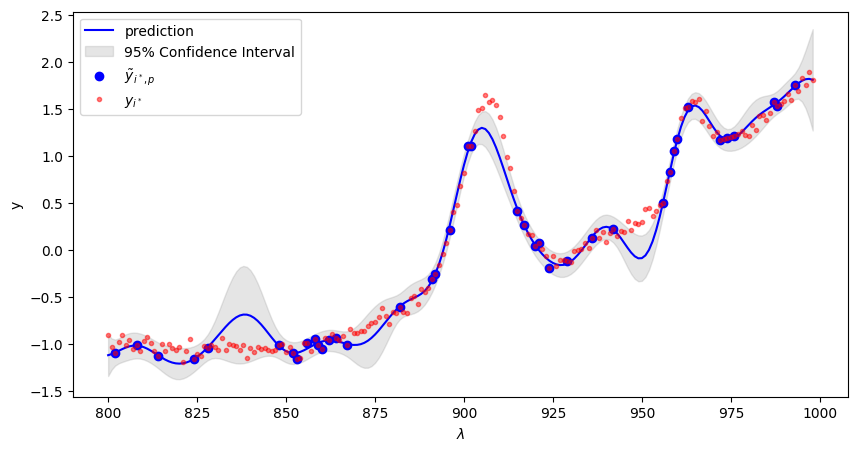

In [20]:
#predicct
y_pred, sigma = gpr.predict(lambda_vec,return_std=True)

#plot
plt.figure(figsize=(10, 5))
plt.plot(lambda_vec,y_pred, "b-", label = "prediction")
plt.fill_between(lambda_vec.ravel(), y_pred - 1.96 * np.sqrt(sigma**2 + sigma_n**2), y_pred + 1.96 * np.sqrt(sigma**2 + sigma_n**2), alpha=0.2, color='gray', label='95% Confidence Interval')
plt.scatter(X, Y, c='b', label='$ \\tilde y_{i^*,p}$')
plt.plot(lambda_vec,spectra_noisy.iloc[i_star].values[0],"ro",markersize = 3,label = "$y_{i^*}$",alpha = 0.5)
plt.xlabel("$\lambda$")
plt.ylabel("y")
plt.legend(loc='upper left')
plt.show()

In [21]:
### 3 ###
#we create X and y iteratively
Y = np.zeros((1))
X = np.zeros((1,5))
for idx,sample in enumerate(spectra_noisy_nan.values):
    #setup as before
    not_nan = ~ np.isnan(sample) 
    lamb = lambda_vec[not_nan]
    y = sample[not_nan]
    #we are going to want to put these in the design matrix next to the ys
    temp = temperatures_I[idx]
    comp = components_I.iloc[idx].values
    #need to reshape these so we can concatenate
    temp_reshaped = np.repeat(temp,lamb.shape[0])[:,None]
    comp_reshaped = np.repeat(comp[None,:],lamb.shape[0],axis = 0)

    X_design = np.concatenate([lamb,temp_reshaped,comp_reshaped],axis = 1)
    
    #join to main one
    X = np.concatenate([X,X_design],axis = 0)
    Y = np.concatenate([Y,y])
#remove first row
X = X[1:,:]
Y = Y[1:]

In [22]:
#kernels
lambda_kernel =  RBF(length_scale=1)
temp_kernel =  RBF(length_scale=10)
comp_kernel = RBF(length_scale = 0.3)
kernel = lambda_kernel + temp_kernel + comp_kernel
#fit
gpr = GaussianProcessRegressor(kernel = kernel, alpha = sigma_n**2)
gpr.fit(X,Y)

GaussianProcessRegressor(alpha=0.0025000000000000005,
                         kernel=RBF(length_scale=1) + RBF(length_scale=10) + RBF(length_scale=0.3))

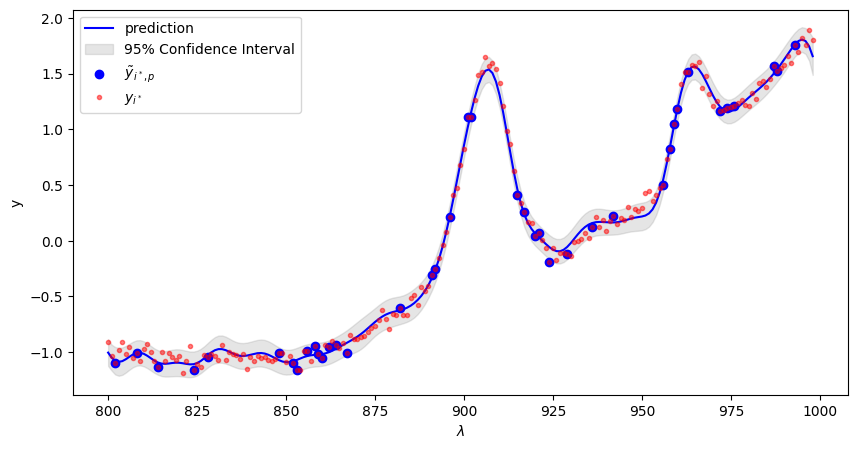

In [23]:
#create design matrix for example, as done in loop, using i_star as defined before
sample = spectra_noisy_nan.iloc[i_star].values[0]
lambda_vec = np.linspace(800,998,199)[:,None]
temp = temperatures_I[i_star]


#create prediction design matrix as above
comp = np.squeeze(components_I.iloc[i_star].values)
X_star = np.concatenate([lambda_vec,np.repeat(temp,lambda_vec.shape[0])[:,None],np.repeat(comp[None,:],lambda_vec.shape[0],axis = 0)],axis = 1)


#predict
y_pred, sigma = gpr.predict(X_star,return_std=True)

#create the present Y and X for plotting
not_nan = ~ np.isnan(sample)
Y_p = sample[not_nan]
X_p = lambda_vec[not_nan]

#plot
plt.figure(figsize=(10, 5))
plt.plot(lambda_vec,y_pred, "b-", label = "prediction")
plt.fill_between(lambda_vec.ravel(), y_pred - 1.96 * np.sqrt(sigma**2 + sigma_n**2), y_pred + 1.96 * np.sqrt(sigma**2 + sigma_n**2), alpha=0.2, color='gray', label='95% Confidence Interval')
plt.scatter(X_p, Y_p, c='b', label='$ \\tilde y_{i^*,p}$')
plt.plot(lambda_vec,spectra_noisy.iloc[i_star].values[0],"ro",markersize = 3,label = "$y_{i^*}$",alpha = 0.5)
plt.xlabel("$\lambda$")
plt.ylabel("y")
plt.legend(loc='upper left')
plt.show()


In [24]:
### 4 ###

#import the datasets, splitting into columns based on space, with no header
components_test = pd.read_csv("q1_data/components_test.csv", sep = " ", header = None)
temperatures_test = pd.read_csv("q1_data/temperatures_test.csv", header = None).to_numpy()
spectra_test = pd.read_csv("q1_data/spectra_test.csv", sep = " ", header = None)

In [25]:
### 4a ###
components_sample = components_test.values[0,:]
spectra_sample = spectra_test.values[0,:]
tempgrid = np.linspace(20,80,61)

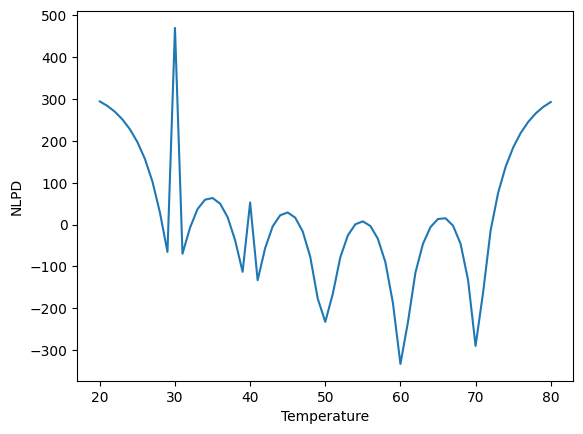

In [26]:
from scipy.stats import norm
lambda_vec = np.linspace(800,998,199)[:,None]
nlpd = []
for temp in tempgrid:
    #create design matrix
    temp_reshaped = np.repeat(temp,lambda_vec.shape[0])[:,None]
    comp_reshaped = np.repeat(components_sample[None,:],lambda_vec.shape[0],axis = 0)
    X = np.concatenate([lambda_vec,temp_reshaped,comp_reshaped],axis = 1)
    #predict
    mu, sigma = gpr.predict(X,return_std=True)
    #log predictive 
    log_prob = norm.logpdf(spectra_sample,loc = mu, scale = np.sqrt(sigma**2 + sigma_n**2))
    nlpd.append(-np.sum(log_prob))

#plot
plt.plot(tempgrid,nlpd)
plt.xlabel("Temperature")
plt.ylabel("NLPD")
plt.show()


In [27]:
print(tempgrid[np.argmin(nlpd)])

60.0


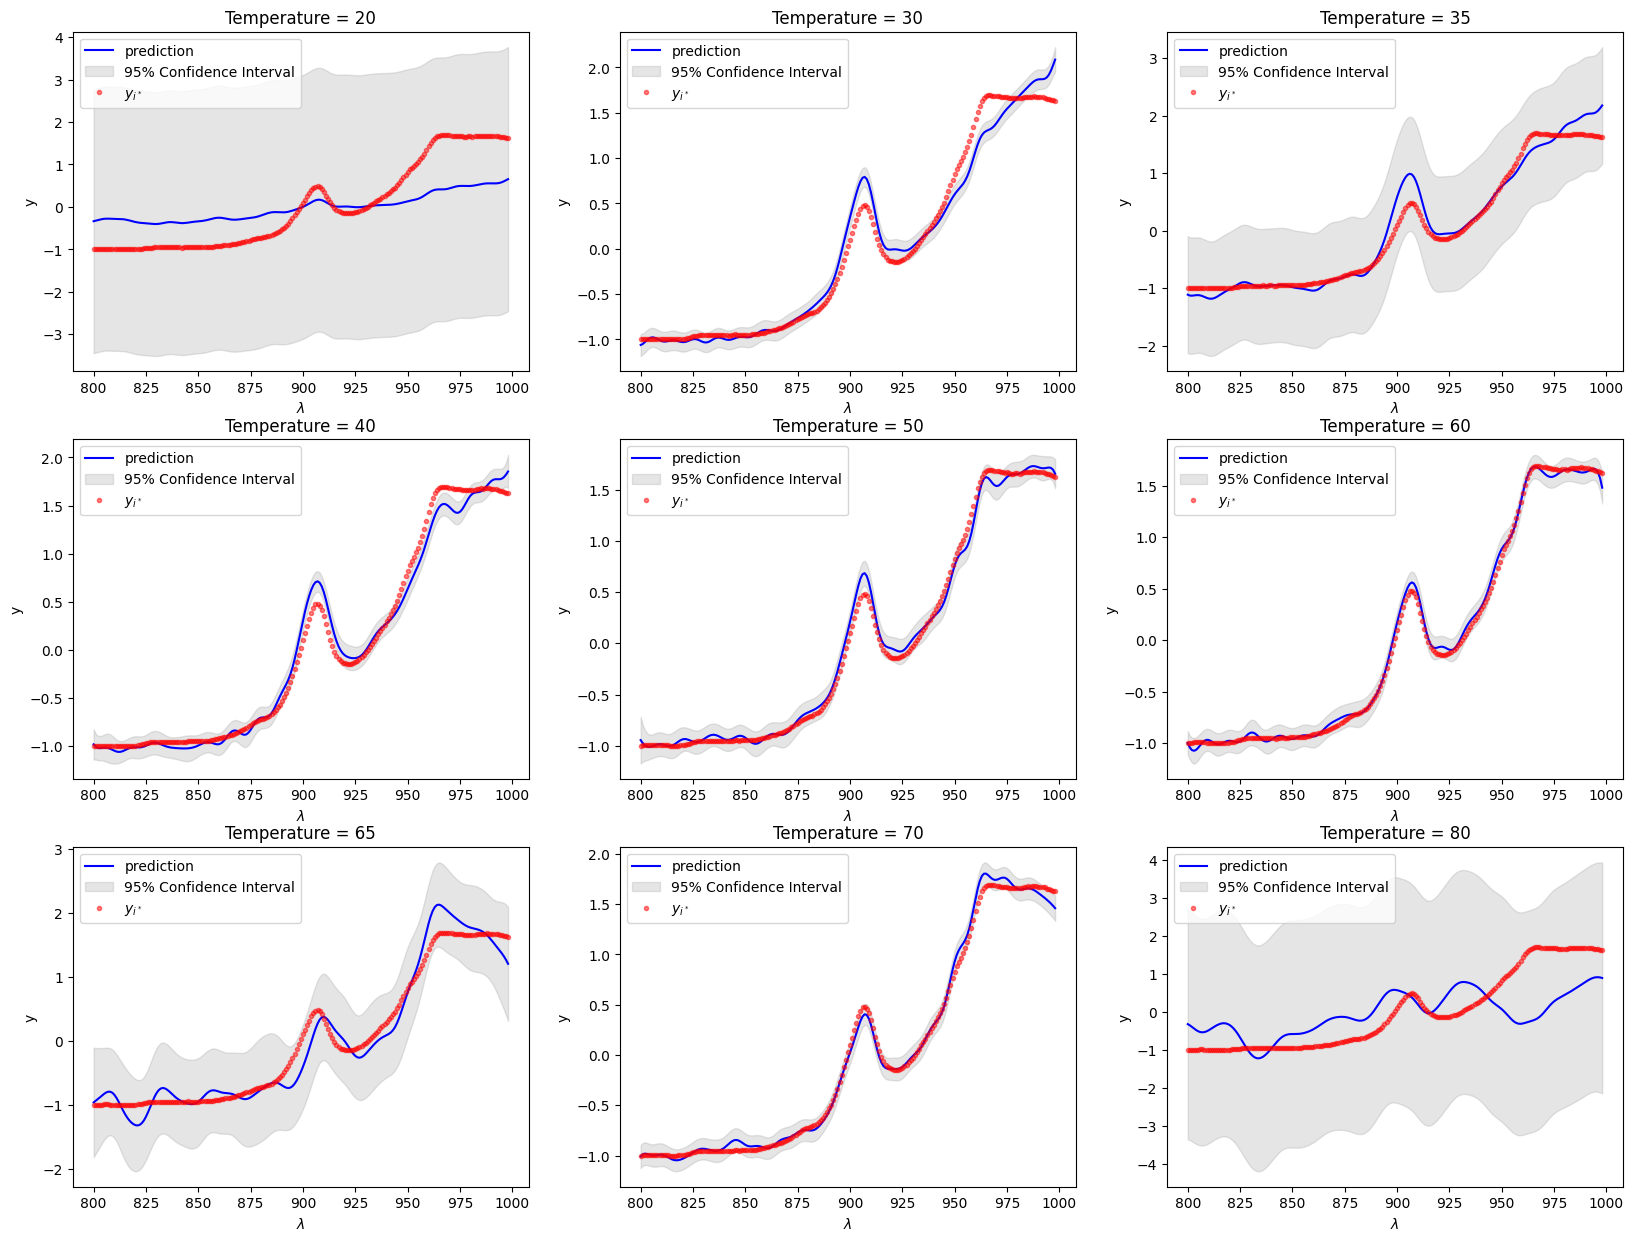

In [28]:
#plot to show the fit as temperature varies
temps = [20,30,35,40,50,60,65,70,80]
fig, axs = plt.subplots(nrows = 3, ncols = 3)
fig.set_figheight(15)
fig.set_figwidth(20)
for i in range(len(temps)):
    temp = np.array([temps[i]])
    comp = np.squeeze(components_sample)
    X_star = np.concatenate([lambda_vec,np.repeat(temp,lambda_vec.shape[0])[:,None],np.repeat(comp[None,:],lambda_vec.shape[0],axis = 0)],axis = 1)
    #predict
    y_pred, sigma = gpr.predict(X_star,return_std=True)

#plot

    axs[i//3, i%3].plot(lambda_vec,y_pred, "b-", label = "prediction")
    axs[i//3, i%3].fill_between(lambda_vec.ravel(), y_pred - 1.96 * np.sqrt(sigma**2 + sigma_n**2), y_pred + 1.96 * np.sqrt(sigma**2 + sigma_n**2), alpha=0.2, color='gray', label='95% Confidence Interval')
    axs[i//3, i%3].plot(lambda_vec, spectra_sample, "o",c='r', label='$ y_{i^*}$', markersize = 3,alpha = 0.5)
    axs[i//3, i%3].set_xlabel("$\lambda$")
    axs[i//3, i%3].set_ylabel("y")
    axs[i//3, i%3].set_title(f"Temperature = {temp[0]}")
    axs[i//3, i%3].legend(loc='upper left')
plt.show()

In [29]:
### 4b ###
temp_sample2  = temperatures_test[1]
spectra_sample2 = spectra_test.values[1,:]

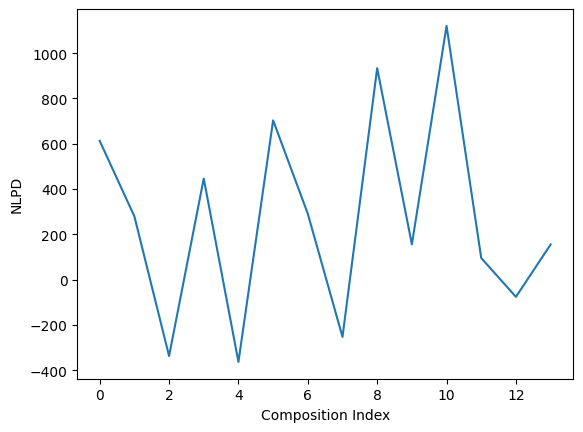

In [30]:
nlpd2 = []
for combo in unique_components.values[:,:-1]:
    #create design matrix
    temp_reshaped = np.repeat(temp_sample2,lambda_vec.shape[0])[:,None]
    comp_reshaped = np.repeat(combo[None,:],lambda_vec.shape[0],axis = 0)
    X = np.concatenate([lambda_vec,temp_reshaped,comp_reshaped],axis = 1)
    #predict
    mu, sigma = gpr.predict(X,return_std=True)
    #log predictive 
    log_prob = norm.logpdf(spectra_sample2,loc = mu, scale = np.sqrt(sigma**2 + sigma_n**2))
    nlpd2.append(-np.sum(log_prob))

plt.plot(np.arange(len(unique_components)), nlpd2)
plt.xlabel("Composition Index")
plt.ylabel("NLPD")
plt.show()

In [31]:
#now find the argmin and composition
unique_components = components_labelled.groupby(components_labelled.columns.tolist(),as_index=False).size()
print(np.argmin([nlpd2]))
print(unique_components.values[:,:-1][np.argmin([nlpd2])])

4
[0. 1. 0.]
